<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/Utiliando_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

In [3]:
# Gerando dados fictícios (simulando 3 grupos de clientes)
np.random.seed(42)
group1 = np.random.multivariate_normal([30, 20], [[30, 0], [0, 30]], 100)
group2 = np.random.multivariate_normal([70, 60], [[25, 10], [10, 25]], 100)
group3 = np.random.multivariate_normal([50, 80], [[20, -5], [-5, 20]], 100)
X = np.vstack([group1, group2, group3])

In [4]:
# Normalizando
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Ajustando GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

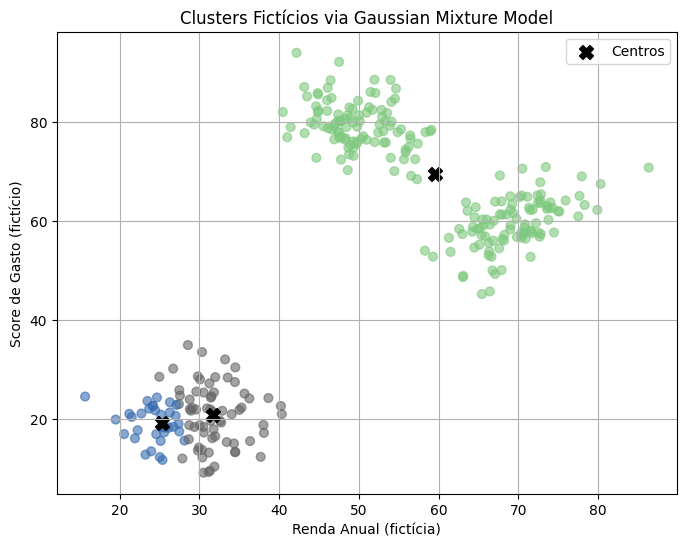

In [6]:
# Visualizando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=40, alpha=0.6)
plt.scatter(scaler.inverse_transform(gmm.means_)[:, 0],
            scaler.inverse_transform(gmm.means_)[:, 1],
            c='black', marker='X', s=100, label='Centros')
plt.xlabel('Renda Anual (fictícia)')
plt.ylabel('Score de Gasto (fictício)')
plt.title('Clusters Fictícios via Gaussian Mixture Model')
plt.legend()
plt.grid(True)
plt.show()

O GMM tenta identificar agrupamentos naturais (clusters) em um conjunto de dados sem que você diga previamente quem pertence a qual grupo.
É usado, por exemplo, para:

Identificar segmentos de clientes com comportamentos semelhantes.

Separar tipos de produtos, perfis de usuários, padrões de movimentação etc.

➡️ Ex: “Clientes com renda alta e baixo gasto” vs “Clientes com renda média e alto gasto”.

2. Modelar a distribuição dos dados como uma mistura de normais
Ao contrário do K-Means, o GMM modela a incerteza e assume que os dados vêm de várias distribuições normais (gaussianas) sobrepostas.
Cada componente tem:

uma média (centro do cluster)

uma covariância (forma e orientação)

um peso (proporção da população total)

➡️ Isso permite descrever a forma estatística dos grupos, incluindo grupos alongados, inclinados ou sobrepostos.



🎯 3. Atribuir probabilidades em vez de rótulos fixos
Cada ponto é associado a uma probabilidade de pertencer a cada grupo, em vez de uma classificação rígida.

➡️ Isso é útil quando há ambiguidade (ex: um cliente que pode pertencer a dois segmentos com chances parecidas).

4. Suporte à tomada de decisão
Depois de identificar os grupos, você pode:

Fazer campanhas específicas para cada perfil de cliente.

Criar produtos mais adaptados a determinados clusters.

Avaliar riscos (em finanças, por exemplo).

Reduzir dimensionalidade ou preparar dados para outras análises.



Grupo | Renda Anual | Gasto | Ação sugerida

1 | Alta | Baixo | Enviar ofertas VIP

2 | Média | Alta | Fidelizar com promoções

3 | Baixa | Média | Oferecer planos acessíveis

# GMM e elipses de covariância

In [7]:
# Gerando os mesmos dados fictícios (3 clusters de clientes)
np.random.seed(42)
group1 = np.random.multivariate_normal([30, 20], [[30, 0], [0, 30]], 100)
group2 = np.random.multivariate_normal([70, 60], [[25, 10], [10, 25]], 100)
group3 = np.random.multivariate_normal([50, 80], [[20, -5], [-5, 20]], 100)
X = np.vstack([group1, group2, group3])

In [8]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Aplicando GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

In [14]:
# Função para desenhar elipses dos clusters
def plot_gmm_ellipses(gmm, scaler, ax):
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]

        # Decomposição da matriz de covariância
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(vals)

        # Corrigido: transformar média para escala original com reshape
        mean_inv = scaler.inverse_transform(mean.reshape(1, -1))[0]

        # Corrigido: ajustar largura e altura à escala original
        width_orig = width * scaler.scale_[0]
        height_orig = height * scaler.scale_[1]

        ellipse = Ellipse(xy=mean_inv, width=width_orig, height=height_orig,
                          angle=theta, edgecolor='black', facecolor='none', lw=2)
        ax.add_patch(ellipse)

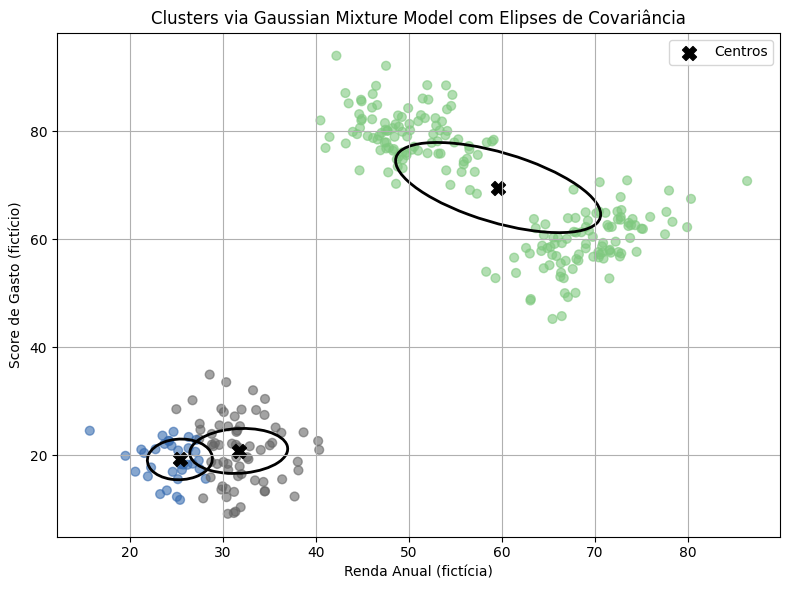

In [17]:
# Visualização
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=40, alpha=0.6)
ax.scatter(scaler.inverse_transform(gmm.means_)[:, 0],
           scaler.inverse_transform(gmm.means_)[:, 1],
           c='black', marker='X', s=100, label='Centros')

plot_gmm_ellipses(gmm, scaler, ax)

ax.set_xlabel('Renda Anual (fictícia)')
ax.set_ylabel('Score de Gasto (fictício)')
ax.set_title('Clusters via Gaussian Mixture Model com Elipses de Covariância')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()



*   Cada cor representa um cluster de clientes.
*   As elipses mostram a forma da distribuição normal ajustada a cada grupo.
*   Os X pretos são os centros estimados dos grupos.
*   A orientação e alongamento das elipses mostram a direção e força da correlação entre as variáveis.